# 4.1 逻辑回归模型算法原理

**4.1.1 逻辑回归模型的数学原理**

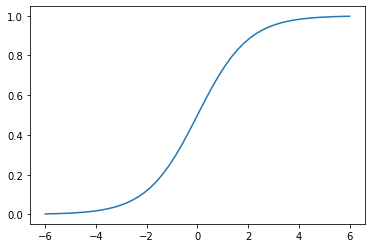

In [2]:
# 补充知识点：Sigmoid函数绘制
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-6, 6)  # 通过linspace()函数生成-6到6的等差数列，默认50个数
y = 1.0 / (1.0 + np.exp(-x))  # Sigmoid函数计算公式，exp()函数表示指数函数

plt.plot(x,y)  # 画图
plt.show()  # 展示

In [3]:
# 演示下linespace()函数
import numpy as np
x = np.linspace(-6, 6)
x

array([-6.        , -5.75510204, -5.51020408, -5.26530612, -5.02040816,
       -4.7755102 , -4.53061224, -4.28571429, -4.04081633, -3.79591837,
       -3.55102041, -3.30612245, -3.06122449, -2.81632653, -2.57142857,
       -2.32653061, -2.08163265, -1.83673469, -1.59183673, -1.34693878,
       -1.10204082, -0.85714286, -0.6122449 , -0.36734694, -0.12244898,
        0.12244898,  0.36734694,  0.6122449 ,  0.85714286,  1.10204082,
        1.34693878,  1.59183673,  1.83673469,  2.08163265,  2.32653061,
        2.57142857,  2.81632653,  3.06122449,  3.30612245,  3.55102041,
        3.79591837,  4.04081633,  4.28571429,  4.53061224,  4.7755102 ,
        5.02040816,  5.26530612,  5.51020408,  5.75510204,  6.        ])

In [3]:
# 演示下np.exp()函数
x = -1 
np.exp(-x)

2.718281828459045

**4.1.2 逻辑回归模型的代码实现**

In [4]:
# 构造数据
X = [[1, 0], [5, 1], [6, 4], [4, 2], [3, 2]]
y = [0, 1, 1, 0, 0]

# 模型训练
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)  # 如果运行时下面出现FutureWarning警告，不要在意，它只是在告诉你以后模型的官方默认参数会有所调整而已，不是报错

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
# 如果不想看到FutureWarning这样的警告信息，可以在代码最上面加上如下内容
import warnings
warnings.filterwarnings('ignore')

In [6]:
# 模型预测 - 预测单个数据
print(model.predict([[2,2]]))

[0]


In [7]:
# 模型预测 - 预测多个数据1
print(model.predict([[1,1], [2,2], [5, 5]]))

[0 0 1]


In [8]:
# 模型预测 - 预测多个数据2
print(model.predict([[1, 0], [5, 1], [6, 4], [4, 2], [3, 2]]))  # 因为这里演示的多个数据和X是一样的，所以也可以直接写成model.predict(X)

[0 1 1 0 0]


可以看到其预测准确度为100%。

**4.1.3 逻辑回归模型的深入理解**

In [9]:
# 预测概率：左列是分类为0的概率，右列是分类为1的概率
y_pred_proba = model.predict_proba(X)
y_pred_proba  # 直接打印

array([[0.97344854, 0.02655146],
       [0.39071972, 0.60928028],
       [0.17991028, 0.82008972],
       [0.63167893, 0.36832107],
       [0.82424527, 0.17575473]])

In [10]:
# 另外一种打印概率的方式：通过DataFrame展示，更加好看些
import pandas as pd
a = pd.DataFrame(y_pred_proba, columns=['分类为0的概率', '分类为1的概率'])  # 2.2.1 通过numpy数组创建DataFrame
a

,分类为0的概率,分类为1的概率
0,0.973449,0.026551
1,0.390720,0.609280
2,0.179910,0.820090
3,0.631679,0.368321
4,0.824245,0.175755


In [11]:
# 打印系数和截距项
print(model.coef_)  # 系数k1与k2
print(model.intercept_)  # 截距项k0

[[1.00595248 0.02223835]]
[-4.60771284]


In [12]:
model.coef_.T

array([[1.00595248],
       [0.02223835]])

In [13]:
# 如果想批量查看预测概率
import numpy as np
for i in range(5):  # 这里共有5条数据，所以循环5次
    print(1 / (1 + np.exp(-(np.dot(X[i], model.coef_.T) + model.intercept_))))

[0.02655146]
[0.60928028]
[0.82008972]
[0.36832107]
[0.17575473]


**补充知识点：多分类逻辑回归模型演示**

In [14]:
# 构造数据，此时y有多个分类
X = [[1, 0], [5, 1], [6, 4], [4, 2], [3, 2]]
y = [-1, 0, 1, 1, 1]  # 这里有三个分类-1、0、1

# 模型训练
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)  # 如果运行时下面出现FutureWarning警告，不要在意，它只是在告诉你以后模型的官方默认参数会有所调整而已，不是报错

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
print(model.predict([[0, 0]]))

[-1]


In [16]:
model.predict(X)

array([-1,  0,  1,  1,  1])

In [17]:
print(model.predict_proba([[0, 0]]))

[[0.88352311 0.02340026 0.09307662]]
